# Importing the necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Data Cleaning

In [8]:
null_values = df.isna().sum()
print(null_values )

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
duplicate_value = df.duplicated().sum()
print(duplicate_value)

0


***This section ensure that our data is clean, with no missing values or duplicates.***

# Statistical Analysis

Statistical analysis involves thoroughly examining each feature in the dataset to understand its characteristics and distribution. It includes evaluating the spread and concentration of values, conducting hypothesis tests to draw inferences, summarizing data using descriptive statistics, and visualizing patterns or trends through various plots for deeper insights.

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [147]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
df.shape

(768, 9)

In [173]:
preg_range = [
    '0-4  ',
    '5-8  ',
    '9-12 ',
    '13-16',
    '17-20'
]
def find_index_preg(value):
    for index,range_str in enumerate(preg_range):
        lower, upper = map(int, range_str.split('-'))
        if lower<=value<=upper:
            return index
    return None
preg = df['Pregnancies'].tolist()
preg_freq_lis = [[] for _ in range(len(preg_range))]
for i in preg:
    index = find_index_preg(i)
    preg_freq_lis[index].append(i)
preg_freq = [len(i) for i in preg_freq_lis]
rel_freq = [round(i/sum(preg_freq),2) for i in preg_freq]
per_freq = [round(i*100,2) for i in rel_freq]
cum_freq = []
cum_per_freq = []
a=0
b=0
for i,j in zip(preg_freq,per_freq):
    a = a+i
    cum_freq.append(a)
    b = b+j
    cum_per_freq.append(b)

In [174]:
print("----------------------------------------------------------------------------------------------------------------------------")
print("Pregnancies Range\tFrequency\t\tPercent Frequency\tCumulative Freq.\tCumulative Per. Freq.")
for i,j,k,l,m in zip(preg_range,preg_freq,per_freq,cum_freq,cum_per_freq):
    print(i,"\t\t\t",j,"\t\t\t",k,"\t\t\t",l,"\t\t\t",m)
print("----------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t",sum(preg_freq),"\t\t\t",sum(per_freq))

----------------------------------------------------------------------------------------------------------------------------
Pregnancies Range	Frequency		Percent Frequency	Cumulative Freq.	Cumulative Per. Freq.
0-4   			 492 			 64.0 			 492 			 64.0
5-8   			 190 			 25.0 			 682 			 89.0
9-12  			 72 			 9.0 			 754 			 98.0
13-16 			 13 			 2.0 			 767 			 100.0
17-20 			 1 			 0.0 			 768 			 100.0
----------------------------------------------------------------------------------------------------------------------------
			 768 			 100.0


In [175]:
glucose_range = [
    '0-20   ',
    '21-40  ',
    '41-60  ',
    '61-80  ',
    '81-100 ',
    '101-120',
    '121-140',
    '141-160',
    '161-180',
    '181-200'
]
def find_index_glucose(value):
    for index,range_str in enumerate(glucose_range):
        lower, upper = map(int, range_str.split('-'))
        if lower<=value<=upper:
            return index
    return None
glucose = df['Glucose'].tolist()
glucose_freq_lis = [[] for _ in range(len(glucose_range))]
for i in glucose:
    index = find_index_glucose(i)
    glucose_freq_lis[index].append(i)
glucose_freq = [len(i) for i in glucose_freq_lis]
rel_freq = [round(i/sum(glucose_freq),4) for i in glucose_freq]
per_freq = [round(i*100,3) for i in rel_freq]
cum_freq = []
cum_per_freq = []
a=0
b=0
for i,j in zip(glucose_freq,per_freq):
    a = a+i
    cum_freq.append(a)
    b = b+j
    cum_per_freq.append(round(b,2))

In [176]:
print("----------------------------------------------------------------------------------------------------------------------------")
print("Glucose Range\t\tFrequency\t\tPercent Frequency\tCumulative Freq.\tCumulative Per. Freq.")
for i,j,k,l,m in zip(glucose_range,glucose_freq,per_freq,cum_freq,cum_per_freq):
    print(i,"\t\t",j,"\t\t\t",k,"\t\t\t",l,"\t\t\t",m)
print("----------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t",sum(glucose_freq),"\t\t\t",round(sum(per_freq)))

----------------------------------------------------------------------------------------------------------------------------
Glucose Range		Frequency		Percent Frequency	Cumulative Freq.	Cumulative Per. Freq.
0-20    		 5 			 0.65 			 5 			 0.65
21-40   		 0 			 0.0 			 5 			 0.65
41-60   		 4 			 0.52 			 9 			 1.17
61-80   		 38 			 4.95 			 47 			 6.12
81-100  		 167 			 21.74 			 214 			 27.86
101-120 		 205 			 26.69 			 419 			 54.55
121-140 		 157 			 20.44 			 576 			 74.99
141-160 		 91 			 11.85 			 667 			 86.84
161-180 		 60 			 7.81 			 727 			 94.65
181-200 		 41 			 5.34 			 768 			 99.99
----------------------------------------------------------------------------------------------------------------------------
			 768 			 100


In [177]:
bp_range = [
    '0-20   ',
    '21-40  ',
    '41-60  ',
    '61-80  ',
    '81-100 ',
    '101-120',
    '121-140'
]
def find_index_bp(value):
    for index,range_str in enumerate(bp_range):
        lower, upper = map(int, range_str.split('-'))
        if lower<=value<=upper:
            return index
    return None
bp = df['BloodPressure'].tolist()
bp_freq_lis = [[] for _ in range(len(bp_range))]
for i in bp:
    index = find_index_bp(i)
    bp_freq_lis[index].append(i)
bp_freq = [len(i) for i in bp_freq_lis]
rel_freq = [round(i/sum(bp_freq),4) for i in bp_freq]
per_freq = [round(i*100,3) for i in rel_freq]
cum_freq = []
cum_per_freq = []
a=0
b=0
for i,j in zip(bp_freq,per_freq):
    a = a+i
    cum_freq.append(a)
    b = b+j
    cum_per_freq.append(round(b,2))

In [178]:
print("----------------------------------------------------------------------------------------------------------------------------")
print("Blood Pressure \t\tFrequency\t\tPercent Frequency\tCumulative Freq.\tCumulative Per. Freq.")
for i,j,k,l,m in zip(bp_range,bp_freq,per_freq,cum_freq,cum_per_freq):
    print(i,"\t\t",j,"\t\t\t",k,"\t\t\t",l,"\t\t\t",m)
print("----------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t",sum(bp_freq),"\t\t\t",round(sum(per_freq)))

----------------------------------------------------------------------------------------------------------------------------
Blood Pressure 		Frequency		Percent Frequency	Cumulative Freq.	Cumulative Per. Freq.
0-20    		 35 			 4.56 			 35 			 4.56
21-40   		 5 			 0.65 			 40 			 5.21
41-60   		 118 			 15.36 			 158 			 20.57
61-80   		 445 			 57.94 			 603 			 78.51
81-100  		 152 			 19.79 			 755 			 98.3
101-120 		 12 			 1.56 			 767 			 99.86
121-140 		 1 			 0.13 			 768 			 99.99
----------------------------------------------------------------------------------------------------------------------------
			 768 			 100


In [179]:
st_range = [
    '0-20   ',
    '21-40  ',
    '41-60  ',
    '61-80  ',
    '81-100 '
]
def find_index_st(value):
    for index,range_str in enumerate(st_range):
        lower, upper = map(int, range_str.split('-'))
        if lower<=value<=upper:
            return index
    return None
st = df['SkinThickness'].tolist()
st_freq_lis = [[] for _ in range(len(st_range))]
n=[]
for i in st:
    index = find_index_st(i)
    if index is not None:
        st_freq_lis[index].append(i)
    else:
        n.append(i)
st_freq = [len(i) for i in st_freq_lis]
rel_freq = [round(i/sum(st_freq),4) for i in st_freq]
per_freq = [round(i*100,3) for i in rel_freq]
cum_freq = []
cum_per_freq = []
a=0
b=0
for i,j in zip(st_freq,per_freq):
    a = a+i
    cum_freq.append(a)
    b = b+j
    cum_per_freq.append(round(b,2))

In [180]:
print("----------------------------------------------------------------------------------------------------------------------------")
print("Skin Thickness\t\tFrequency\t\tPercent Frequency\tCumulative Freq.\tCumulative Per. Freq.")
for i,j,k,l,m in zip(st_range,st_freq,per_freq,cum_freq,cum_per_freq):
    print(i,"\t\t",j,"\t\t\t",k,"\t\t\t",l,"\t\t\t",m)
print("----------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t",sum(st_freq),"\t\t\t",round(sum(per_freq)))

----------------------------------------------------------------------------------------------------------------------------
Skin Thickness		Frequency		Percent Frequency	Cumulative Freq.	Cumulative Per. Freq.
0-20    		 351 			 45.7 			 351 			 45.7
21-40   		 343 			 44.66 			 694 			 90.36
41-60   		 72 			 9.38 			 766 			 99.74
61-80   		 1 			 0.13 			 767 			 99.87
81-100  		 1 			 0.13 			 768 			 100.0
----------------------------------------------------------------------------------------------------------------------------
			 768 			 100


In [181]:
bmi_range = [
    '0-10.9 ',
    '11-20.9',
    '21-30.9',
    '31-40.9',
    '41-50.9',
    '51-60.9',
    '61-70.9'
]
def find_index_bmi(value):
    for index,range_str in enumerate(bmi_range):
        lower, upper = map(float, range_str.split('-'))
        if lower<=value<=upper:
            return index
    return None
bmi = df['BMI'].tolist()
bmi_freq_lis = [[] for _ in range(len(bmi_range))]
n=[]
for i in bmi:
    index = find_index_bmi(i)
    if index is not None:
        bmi_freq_lis[index].append(i)
    else:
        n.append(i)
bmi_freq = [len(i) for i in bmi_freq_lis]
rel_freq = [round(i/sum(bmi_freq),4) for i in bmi_freq]
per_freq = [round(i*100,3) for i in rel_freq]
cum_freq = []
cum_per_freq = []
a=0
b=0
for i,j in zip(bmi_freq,per_freq):
    a = a+i
    cum_freq.append(a)
    b = b+j
    cum_per_freq.append(round(b,2))

In [182]:
print("----------------------------------------------------------------------------------------------------------------------------")
print("BMI\t\t\tFrequency\t\tPercent Frequency\tCumulative Freq.\tCumulative Per. Freq.")
for i,j,k,l,m in zip(bmi_range,bmi_freq,per_freq,cum_freq,cum_per_freq):
    print(i,"\t\t",j,"\t\t\t",k,"\t\t\t",l,"\t\t\t",m)
print("----------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t",sum(bmi_freq),"\t\t\t",round(sum(per_freq)))

----------------------------------------------------------------------------------------------------------------------------
BMI			Frequency		Percent Frequency	Cumulative Freq.	Cumulative Per. Freq.
0-10.9  		 11 			 1.43 			 11 			 1.43
11-20.9 		 19 			 2.47 			 30 			 3.9
21-30.9 		 313 			 40.76 			 343 			 44.66
31-40.9 		 342 			 44.53 			 685 			 89.19
41-50.9 		 75 			 9.77 			 760 			 98.96
51-60.9 		 7 			 0.91 			 767 			 99.87
61-70.9 		 1 			 0.13 			 768 			 100.0
----------------------------------------------------------------------------------------------------------------------------
			 768 			 100


In [183]:
age_range = [
    '21-30',
    '31-40',
    '41-50',
    '51-60',
    '61-70',
    '71-80',
    '81-90'
]
def find_index_age(value):
    for index,range_str in enumerate(age_range):
        lower, upper = map(int, range_str.split('-'))
        if lower<=value<=upper:
            return index
    return None
age = df['Age'].tolist()
age_freq_lis = [[] for _ in range(len(age_range))]
n=[]
for i in age:
    index = find_index_age(i)
    if index is not None:
        age_freq_lis[index].append(i)
    else:
        n.append(i)
age_freq = [len(i) for i in age_freq_lis]
rel_freq = [round(i/sum(age_freq),4) for i in age_freq]
per_freq = [round(i*100,3) for i in rel_freq]
cum_freq = []
cum_per_freq = []
a=0
b=0
for i,j in zip(age_freq,per_freq):
    a = a+i
    cum_freq.append(a)
    b = b+j
    cum_per_freq.append(round(b,2))

In [184]:
print("----------------------------------------------------------------------------------------------------------------------------")
print("Age\t\tFrequency\t\tPercent Frequency\tCumulative Freq.\tCumulative Per. Freq.")
for i,j,k,l,m in zip(age_range,age_freq,per_freq,cum_freq,cum_per_freq):
    print(i,"\t\t",j,"\t\t\t",k,"\t\t\t",l,"\t\t\t",m)
print("----------------------------------------------------------------------------------------------------------------------------")
print("\t\t",sum(age_freq),"\t\t\t",round(sum(per_freq)))

----------------------------------------------------------------------------------------------------------------------------
Age		Frequency		Percent Frequency	Cumulative Freq.	Cumulative Per. Freq.
21-30 		 417 			 54.3 			 417 			 54.3
31-40 		 157 			 20.44 			 574 			 74.74
41-50 		 113 			 14.71 			 687 			 89.45
51-60 		 54 			 7.03 			 741 			 96.48
61-70 		 25 			 3.26 			 766 			 99.74
71-80 		 1 			 0.13 			 767 			 99.87
81-90 		 1 			 0.13 			 768 			 100.0
----------------------------------------------------------------------------------------------------------------------------
		 768 			 100


# Data Pre-processing

In [16]:
# Features to scale
columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin', 'Age']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,1
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000,1


# Data Splitting

In [19]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building
## Sequential Model

In [23]:
model = Sequential([
    Dense(64, input_shape = (x_train.shape[1],) , activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation = "sigmoid")
])

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6411 - loss: 0.6804 - val_accuracy: 0.6098 - val_loss: 0.6748
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.6634 - loss: 0.6576 - val_accuracy: 0.6098 - val_loss: 0.6670
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.6760 - loss: 0.6421 - val_accuracy: 0.6179 - val_loss: 0.6581
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.6436 - loss: 0.6406 - val_accuracy: 0.6260 - val_loss: 0.6515
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6298 - loss: 0.6367 - val_accuracy: 0.6098 - val_loss: 0.6524
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.6752 - loss: 0.6326 - val_accuracy: 0.6179 - val_loss: 0.6374
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6552 - loss: 0.6197 - val_accuracy: 0.6179 - val_loss: 0.6435
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6217 - loss: 0.6458 - val_accura

In [28]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [29]:
# Prediction
y_pred_train = (model.predict(x_train) > 0.5).astype("int32")
y_pred_test = (model.predict(x_test) > 0.5).astype("int32")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


In [195]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

## Functional API

In [187]:
inputs = Input(shape=(x_train.shape[1],),batch_size=32)
layer1 = Dense(64, activation="relu")(inputs)
layer2 = Dense(32, activation="relu")(layer1)
output = Dense(1, activation="sigmoid")(layer2)

model_fapi = Model(inputs=inputs, outputs = output)
model_fapi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [188]:
# Train the model
history_api = model_fapi.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5355 - loss: 0.6947 - val_accuracy: 0.6098 - val_loss: 0.6959
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.6883 - loss: 0.6598 - val_accuracy: 0.6098 - val_loss: 0.6811
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.6502 - loss: 0.6617 - val_accuracy: 0.6098 - val_loss: 0.6649
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.6638 - loss: 0.6380 - val_accuracy: 0.6098 - val_loss: 0.6607
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6595 - loss: 0.6391 - val_accuracy: 0.6260 - val_loss: 0.6499
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.6548 - loss: 0.6410 - val_accuracy: 0.6098 - val_loss: 0.6529
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.6435 - loss: 0.6424 - val_accuracy: 0.6098 - val_loss: 0.6404
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.6683 - loss: 0.6204 - val_accuracy

In [190]:
# Evaluate the model
train_loss_api, train_accuracy_api = model_fapi.evaluate(x_train, y_train, verbose=0)
test_loss_api, test_accuracy_api = model_fapi.evaluate(x_test, y_test, verbose=0)

In [191]:
# Prediction
y_pred_train_api = (model.predict(x_train) > 0.5).astype("int32")
y_pred_test_api = (model.predict(x_test) > 0.5).astype("int32")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


In [194]:
model_fapi.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (32, 8)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 64)               │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

# Model Evaluation

In [31]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.8029316067695618
Testing Accuracy: 0.7857142686843872
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[86 13]
 [20 35]]


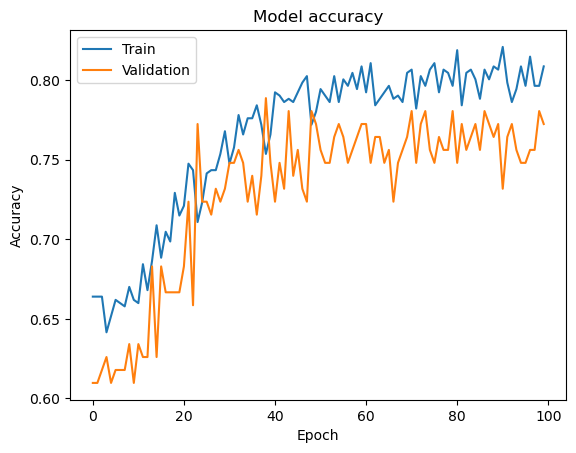

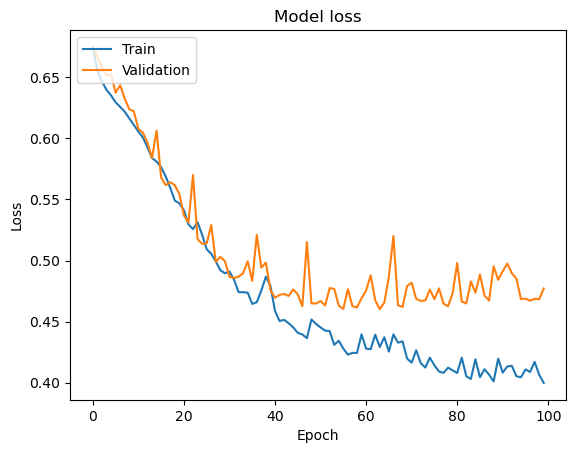

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [192]:
print("Training Accuracy:", train_accuracy_api)
print("Testing Accuracy:", test_accuracy_api)

print("Classification Report:\n", classification_report(y_test, y_pred_test_api))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_api))

Training Accuracy: 0.7947883009910583
Testing Accuracy: 0.7597402334213257
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[86 13]
 [20 35]]


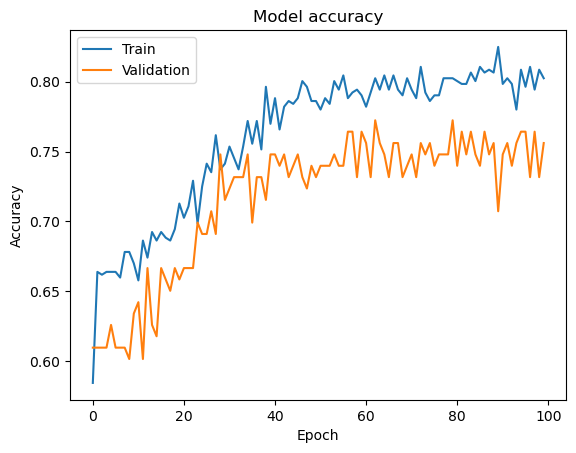

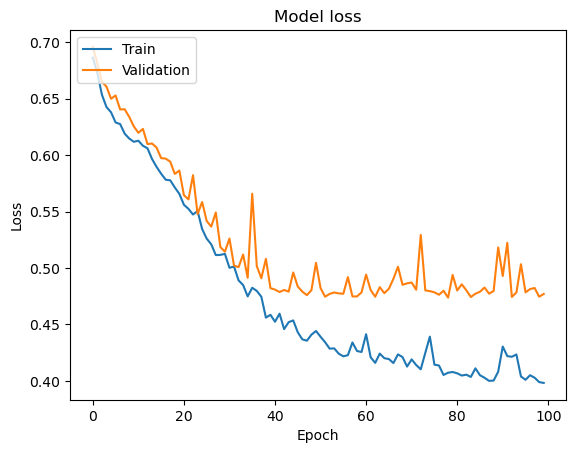

In [193]:
# Plot training & validation accuracy values
plt.plot(history_api.history['accuracy'])
plt.plot(history_api.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot(history_api.history['loss'])
plt.plot(history_api.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()